### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Menonaktifkan semua warning
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler

### Read the Dataset

In [2]:
df = pd.read_csv(r'ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


### Data Features

Attribute Information:

- model : Ford Car Brands
- year : Production Year
- price : Price of car in Dollar
- transmission : Automatic,Manual, Semi-Auto
- mileage : Number of miles traveled
- fuel_Type : Petrol,Diesel,Hybrid,Electric,Other
- tax : Annual Tax
- mpg : Miles per Gallon
- engineSize : Car's Engine Size

### Statistical Information and General Information about the Data

In [4]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.duplicated().sum()

154

In [9]:
data_duplikat = df.duplicated(keep = False)
baris_duplikat = df[data_duplikat]
baris_duplikat.sort_values(by = ['model', 'year'], ascending = True).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8480,B-MAX,2013,6995,Manual,31472,Petrol,30,57.7,1.0
9406,B-MAX,2013,6995,Manual,31472,Petrol,30,57.7,1.0
10224,B-MAX,2014,6995,Manual,17441,Diesel,20,68.9,1.5
10272,B-MAX,2014,6995,Manual,17441,Diesel,20,68.9,1.5
2671,B-MAX,2017,12000,Manual,8589,Petrol,145,57.7,1.0
2994,B-MAX,2017,12000,Manual,8589,Petrol,145,57.7,1.0
10237,B-MAX,2017,9495,Manual,32442,Petrol,145,55.4,1.0
10257,B-MAX,2017,9495,Manual,32442,Petrol,145,55.4,1.0
17607,B-MAX,2017,11495,Automatic,5000,Petrol,145,44.1,1.6
17608,B-MAX,2017,11495,Automatic,5000,Petrol,145,44.1,1.6


Setelah dilakukan identifikasi data duplikat, sepertinya ada kesalahan entry data yang menyebabkan mobil dengan data yang sama ter-input dua kali. Untuk itu, keputusan selanjutnya adalah menghapus data duplikat namun tetap mempertahankan baris pertamanya.

In [10]:
df.drop_duplicates(keep = 'first', inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,12269.556310,23381.146362,113.315012,57.908696,1.350623
std,2.052039,4736.285417,19419.011045,62.034603,10.132696,0.432581
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11288.000000,18277.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31098.500000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [33]:
print("Baris data : ", df.shape[0])
print("Kolom data : ", df.shape[1])

Baris data :  17812
Kolom data :  9


### Exploratory Data Analyst

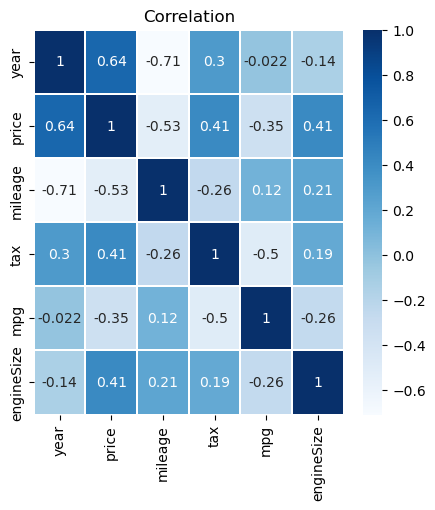

In [15]:
df_corr = df.corr()
plt.figure(figsize = (5,5))
sns.heatmap(df_corr, annot= True, linewidth = 0.3, cmap = 'Blues')
plt.title("Correlation")
plt.show()

Review : 

- korelasi antara price dan year memiliki nilai yang cukup besar yaitu 64%, kemungkinan pola yang terjadi adalah semakin baru tahu mobil tersebut, semakin mahal juga harga mobil tersebut. namun korelasi ini hanya 64%, karena tidak selalu mobil mahal karena tahunnya semakin baru, ada juga mobil keluaran tahun lama juga harganya masih tetap tinggi, contohnya seperti mobil vintage yang rare atau langka.
- korelasi antara tax dan price memiliki nilai juga cukup besar yaitu 41%, untuk dibeberapa negara memang terkadang semakin tinggi harga mobil semakin tinggi juga harga pajak tahunan yang harus dibayar. namun korelasi ini hanya 41%, karena tax yang tinggi untuk dibeberapa negara lain dipengaruhi oleh kapasitas cc yang sudah ditentukan per kategori, bisa dilihat divisualisasi heatmap diatas menunjukkan bahwa ada korelasi antara tax dan enginesize sebesar 19%. selain itu, tax juga dipengaruhi oleh tahun, biasanya semakin tinggi tahun mobil tersebut, semakin tinggi pajak tahunannya juga. karena biasanya mobil keluaran terbaru masuk dalam kebijakan-kebijakan baru dari pemerintah tiap negara.
- price dengan engineSize memiliki nilai korelasi sebesar 41%, kemungkinan pola yang terjadi adalah semakin besar kapasitas cc atau enginesize pada mobil, semakin tinggi juga harga jual mobil tersebut. namun korelasi ini hanya 41%, karena masih banyak faktor untuk harga mobil semakin tinggi tidak hanya dari enginesize saja.
- mileage dan mpg memiliki nilai korelasi sebesar 12%, kemungkinan pola yang terjadi adalah semakin tinggi catatan mileage pada tiap mobil terkadang juga mempengaruhi konsumsi bahan bakar per liter. namun korelasi ini hanya 12%, karena jika konsumsi bahan bakar per liternya menjadi turun atau tidak sama dengan awal, itu dikarenakan mobil tersebut jarang melakukan maintenance atau service rutin.
- enginesize dan mileage juga memiliki korelasi sebesar 21%, kemungkinan pola yang terjadi adalah untuk mobil yang memiliki enginesize kecil kebanyakan digunakan untuk perjalanan jauh atau roadtrip, dikarenakan enginesize kecil biasanya lebih awet, tahan cuaca, dan tidak cepat panas. namun bukan berarti mobil dengan enginesize besar tidak bisa digunakan untuk perjalanan jauh, mobil ber-enginesize besar lebih besar peluang untuk kerusakan jika digunakan dalam tempo yang lama dan jauh.
- enginesize dan year memiliki korelasi sebesar 14%, kemungkinan pola yang terjadi adalah untuk mobil yang tahun tahun baru mungkin lebih banyak keluaran dengan enginesize besar. Namun korelasi ini hanya 14%, karena masih banyak mobil dengan keluaran tahun baru namun enginesize nya kecil.

#### Check Outliers

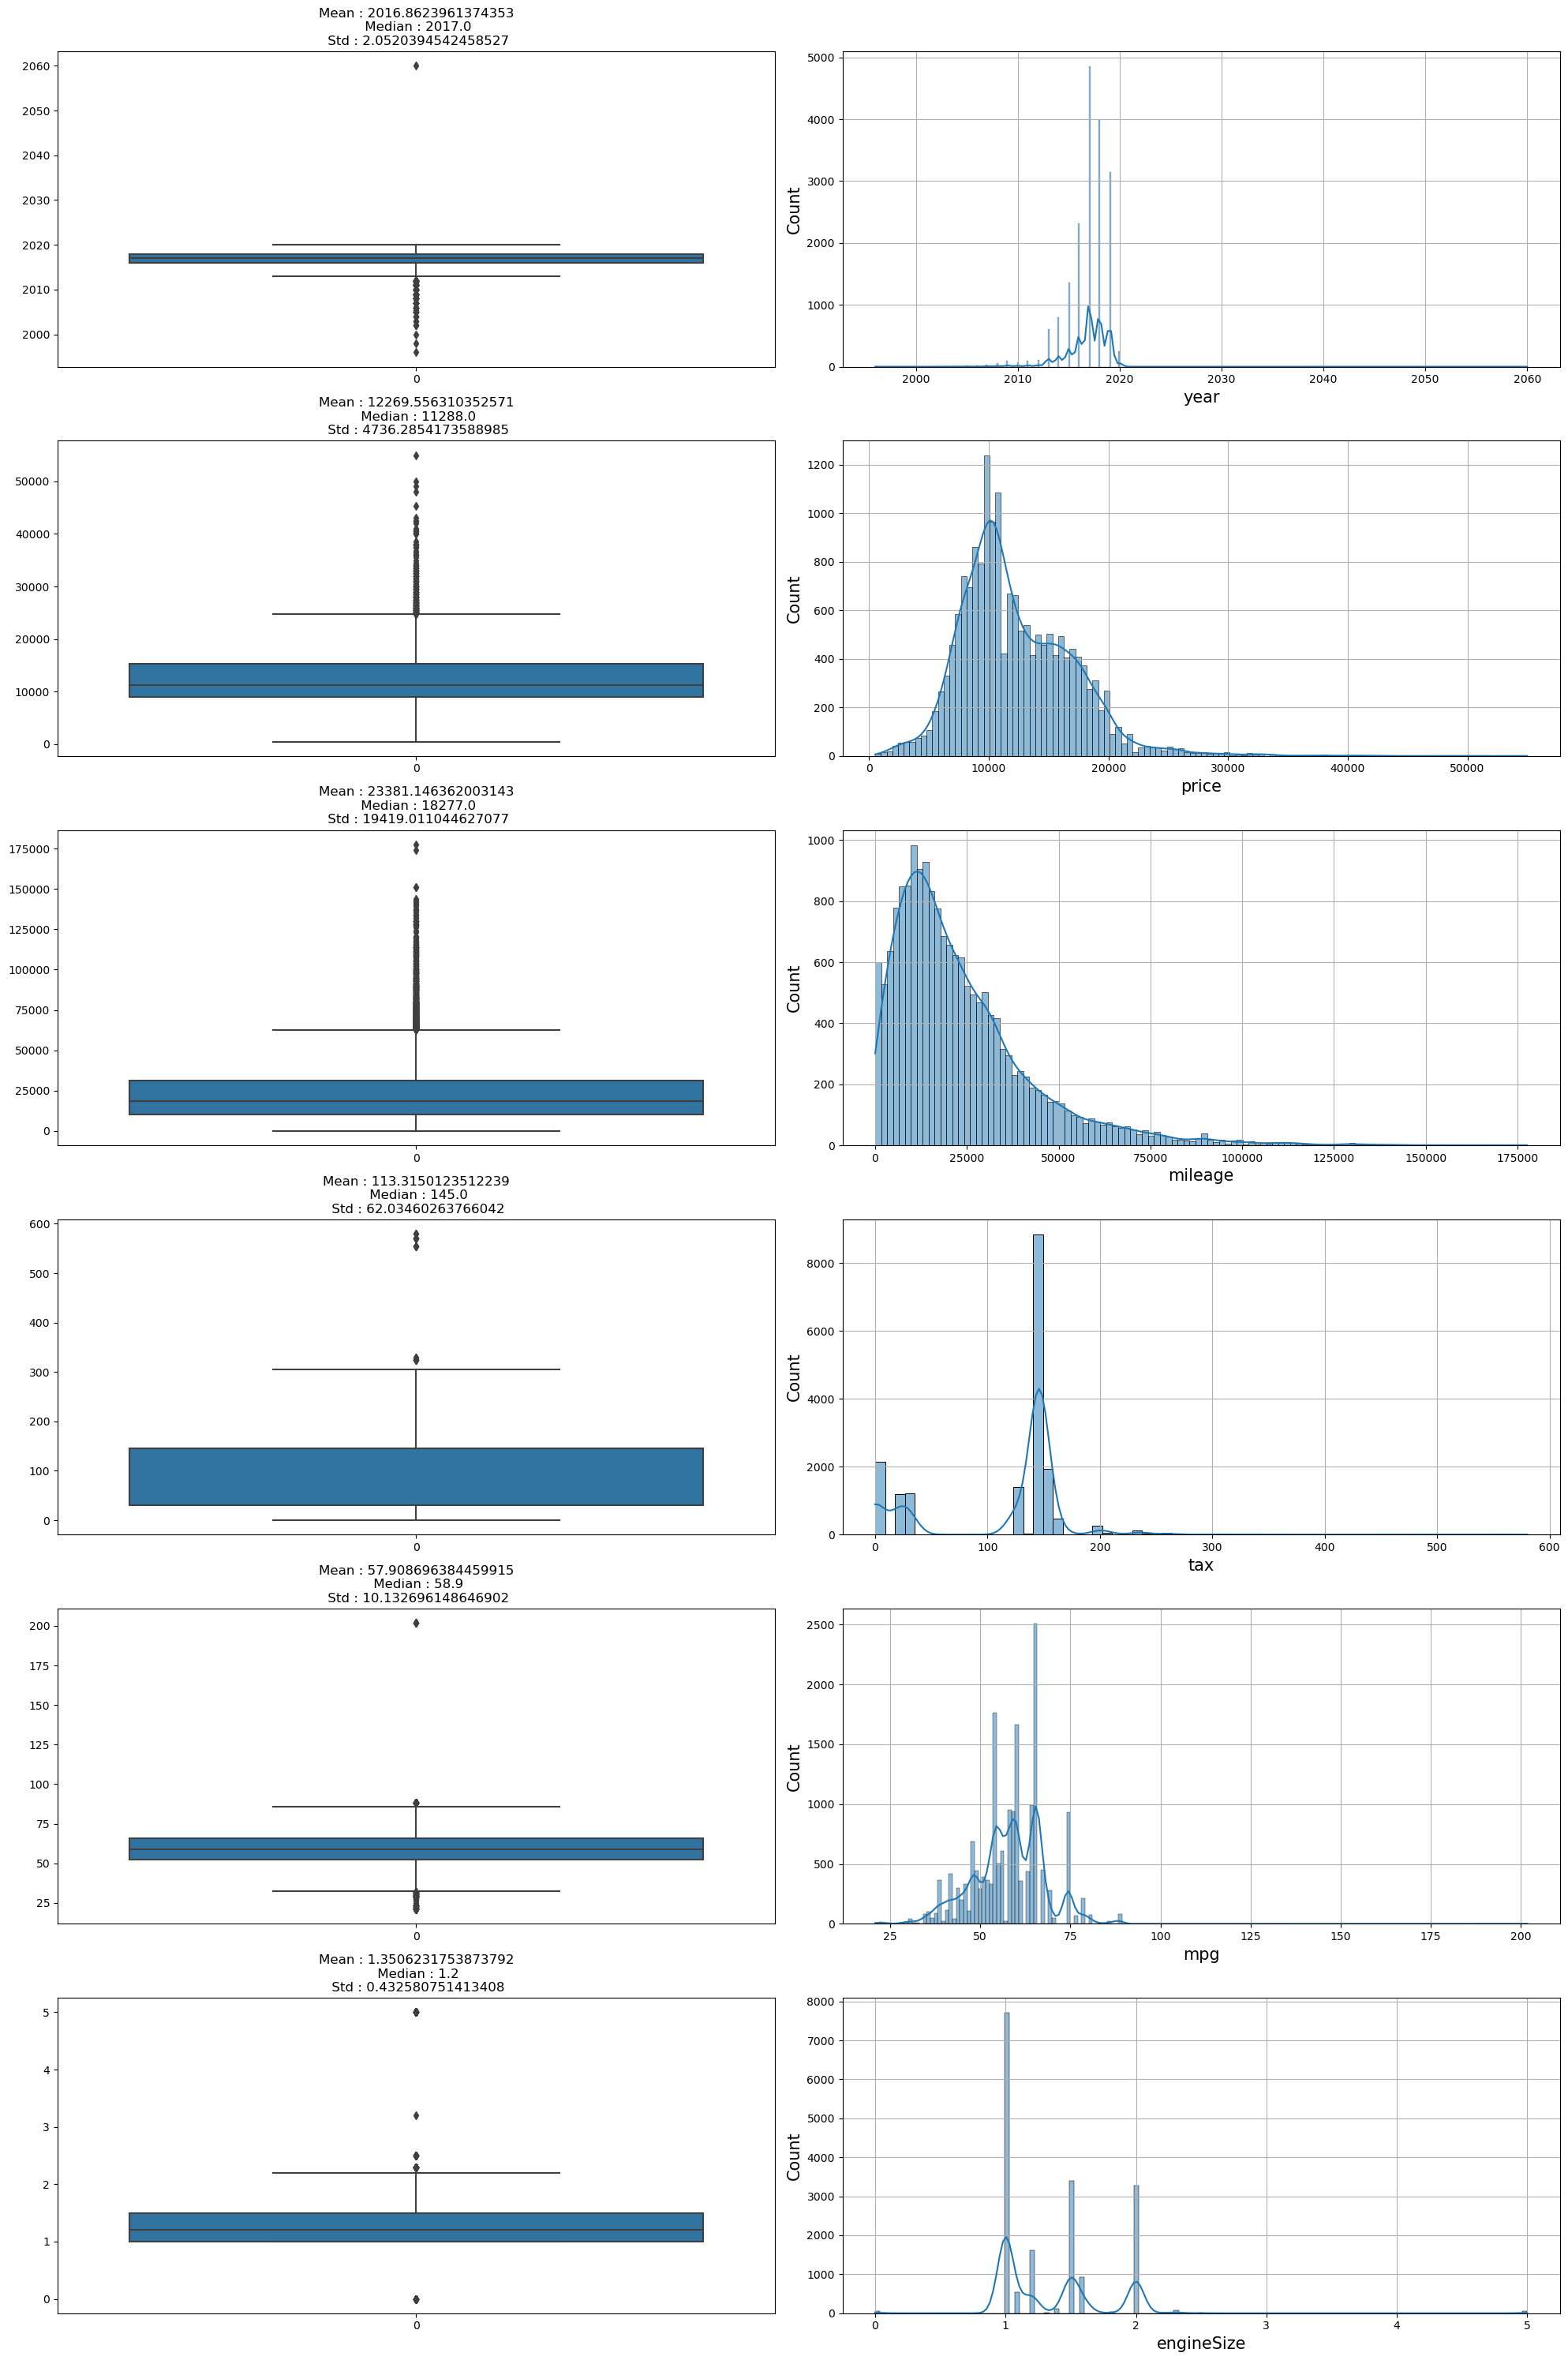

In [22]:
features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

fig, ax = plt.subplots(6, 2, figsize = (20, 30))
for i, col in enumerate(features):
    sns.boxplot(df[col], ax=ax[i][0])
    sns.histplot(df[col], ax=ax[i][1], kde = True)
    ax[i][0].set_title("Mean : {}\n Median : {}\n Std : {}".format(df[col].mean(),
                                                                  df[col].median(),
                                                                  df[col].std()))
    ax[i][1].set_xlabel(f"{col}", fontsize = 15)
    ax[i][1].set_ylabel("Count", fontsize = 15)
    ax[i][1].grid(True)
plt.tight_layout()
plt.show()

#### Mengindentifikasi mobil yang memiliki nilai mpg paling tinggi

In [25]:
print("Mobil yang memiliki nilai mpg paling tinggi : ", df.groupby('model')['mpg'].max())

Mobil yang memiliki nilai mpg paling tinggi :  model
 B-MAX                     80.7
 C-MAX                     68.9
 EcoSport                  68.9
 Edge                      48.7
 Escort                    34.4
 Fiesta                    88.3
 Focus                     83.1
 Fusion                    64.2
 Galaxy                    56.5
 Grand C-MAX               64.2
 Grand Tourneo Connect     64.2
 KA                        68.9
 Ka+                       57.7
 Kuga                     201.8
 Mondeo                    78.5
 Mustang                   35.3
 Puma                      51.4
 Ranger                    28.3
 S-MAX                     56.5
 Streetka                  35.8
 Tourneo Connect           64.2
 Tourneo Custom            46.3
 Transit Tourneo           42.2
Focus                      57.7
Name: mpg, dtype: float64


In [26]:
print("Rata-rata mpg mobil Ford : ", df['mpg'].mean())

Rata-rata mpg mobil Ford :  57.908696384459915


Setelah mengindentifikasi outliers, beberapa fitur pada mobil memang sudah natural menjadi karakteristik mobil tersebut dari awal. namun saya tetap menghapus outliers pada fitur 'mpg' namun hanya outliers yang melebihi batas maximum pada visualisasi boxplot.

#### hapus outliers 'mpg' maximum

In [30]:
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)

IQR = Q3 - Q1

# Batas atas
upper = Q3 + 1.5 * IQR

data_outliers = df[df['mpg'] > upper]

data_outliers['mpg'].unique()

array([ 88.3, 201.8])

data pada fitur mpg yang melebihi baris atas adalah 88.3 dan 201.8

In [36]:
print("Jumlah baris awal : ", df.shape[0])

df = df[df['mpg'] <= upper]

print("Jumlah baris setelah dilakukan penghapusan outliers : ", df.shape[0])

Jumlah baris awal :  17812
Jumlah baris setelah dilakukan penghapusan outliers :  17723


#### Cek distrusi fitur mpg menggunakan boxplot

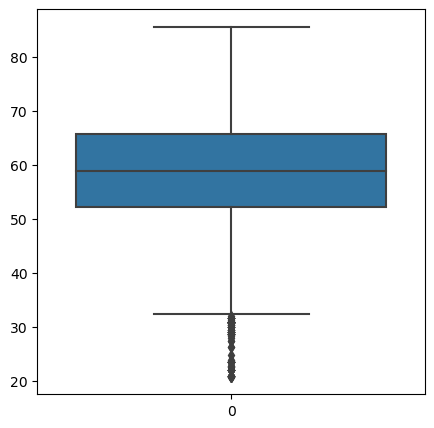

In [39]:
plt.figure(figsize = (5,5))
sns.boxplot(df['mpg'])
plt.show()

#### menghapus tahun mobil yang melebihi maximum interquartile

In [70]:
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)

IQR = Q3 - Q1

# Batas atas
upper = Q3 + 1.5 * IQR

data_outliers = df[df['year'] > upper]

data_outliers['year'].unique()

array([2060], dtype=int64)

In [71]:
print("Jumlah baris awal : ", df.shape[0])

df = df[df['year'] <= upper]

print("Jumlah baris setelah dilakukan penghapusan outliers : ", df.shape[0])

Jumlah baris awal :  17723
Jumlah baris setelah dilakukan penghapusan outliers :  17722


In [72]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


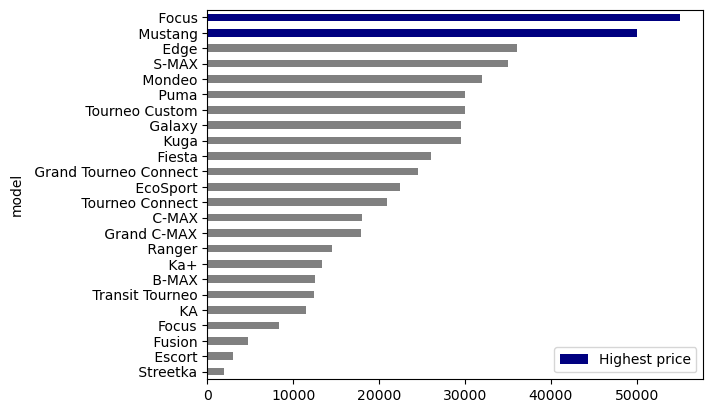

In [73]:
model_price = df.groupby('model')['price'].max().reset_index()

ax = model_price.sort_values('price', ascending = False).plot(kind ='barh', x = 'model', y= 'price', color=['navy' if i < 2 else 'grey' for i in range(len(model_price))])
ax.invert_yaxis()
plt.legend(labels = ['Highest price'])
plt.show()

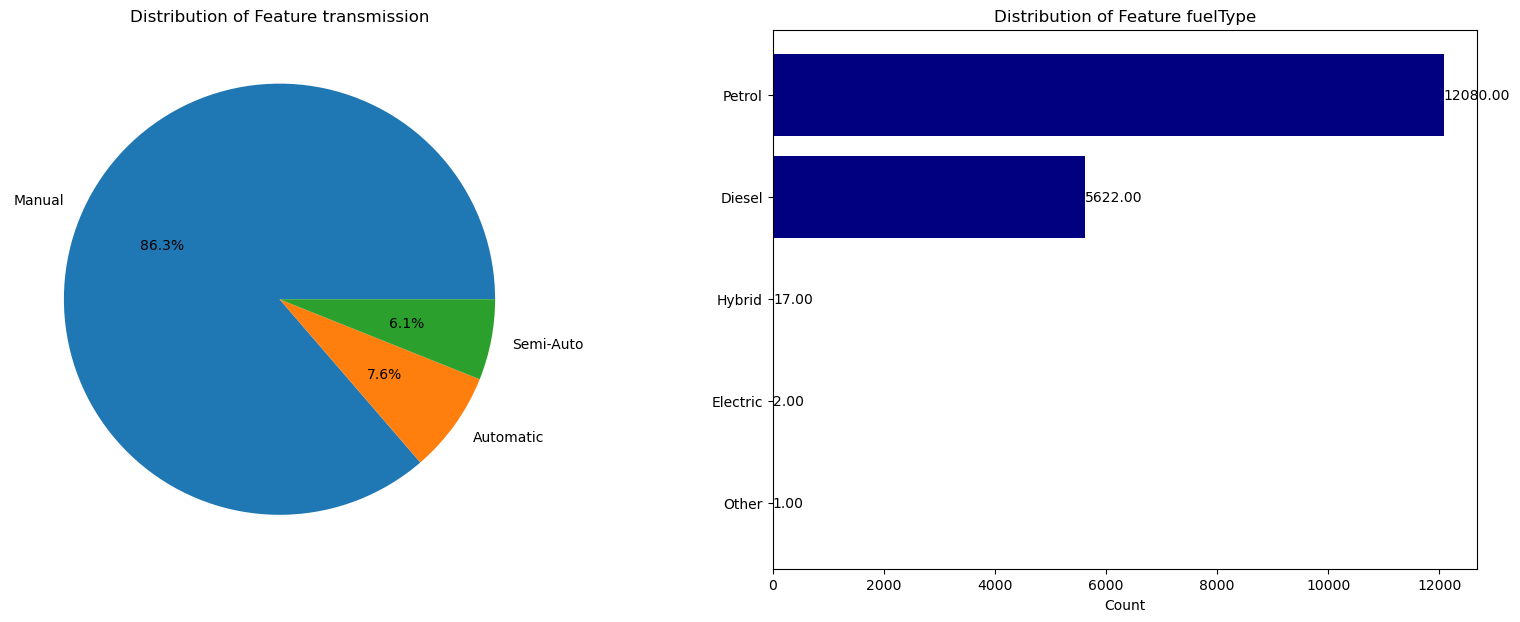

In [74]:
kategori = ['transmission', 'fuelType']

fig, ax = plt.subplots(1, 2, figsize = (20, 7))
for i, col in enumerate(kategori):
    dataa = df[col].value_counts()
    index = dataa.index
    value = dataa.values
    
    # Check the column type and plot accordingly
    if i == 0:  # First column: Pie chart
        ax[i].pie(value, labels=index, autopct='%1.1f%%')
    else:  # Second column: Horizontal bar chart
        bars = ax[i].barh(y=index, width=value, color='navy')
        for bar in bars:
            width = bar.get_width()
            label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
            plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')
        ax[i].set_xlabel('Count')  # Add a label for the x-axis
        ax[i].invert_yaxis()
    
    ax[i].set_title(f"Distribution of Feature {col}")
plt.show()

Model transmission pada merk Ford sekitar 86% didominasi oleh transmission 'Manual'. Untuk bahan bakar didominasi oleh bahan bakar tipe Petrol dan Diesel.

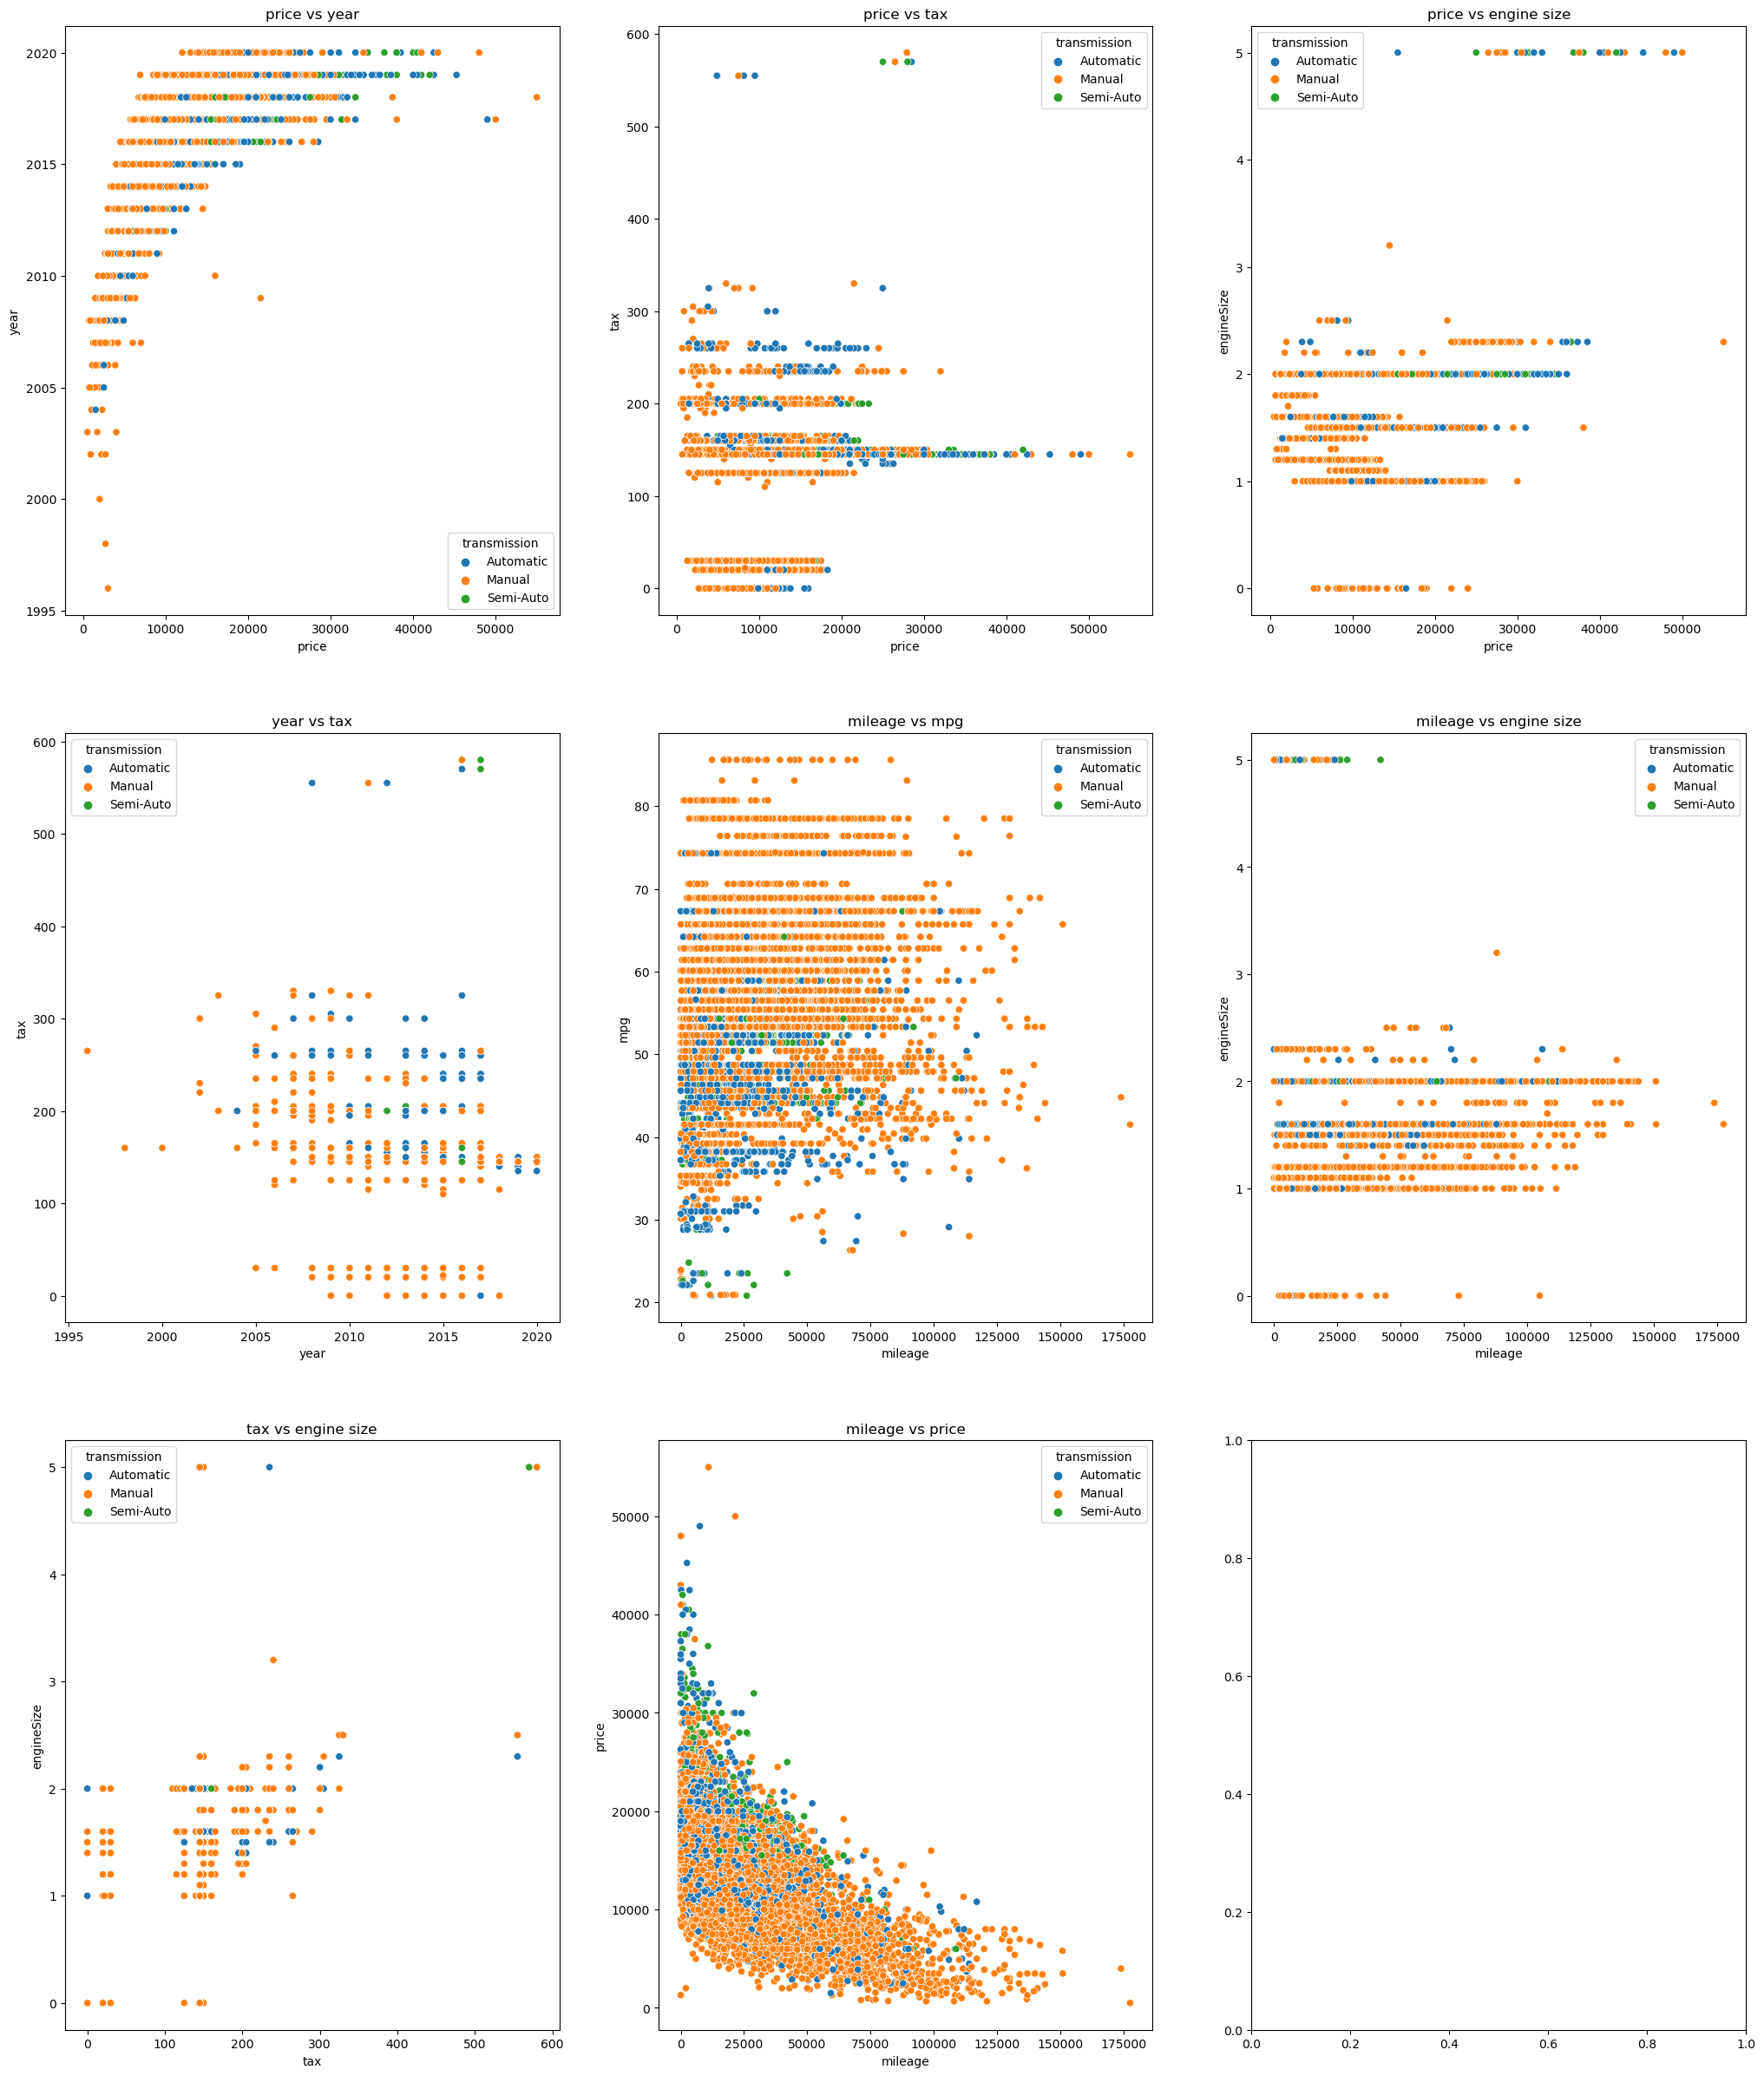

In [85]:
persebaran_data = [('price', 'year', 'price vs year'),
                  ('price', 'tax', 'price vs tax'),
                  ('price', 'engineSize', 'price vs engine size'),
                  ('year', 'tax', 'year vs tax'),
                  ('mileage', 'mpg', 'mileage vs mpg'),
                  ('mileage', 'engineSize', 'mileage vs engine size'),
                  ('tax', 'engineSize', 'tax vs engine size'),
                  ('mileage', 'price', 'mileage vs price')]

fig, ax = plt.subplots(3, 3, figsize = (25, 30))
for i, (x_feature, y_feature, title) in enumerate (persebaran_data):
    row = i // 3
    col = i % 3
    
    sns.scatterplot(data=df, x=x_feature, y=y_feature, hue = 'transmission', ax=ax[row][col])
    ax[row][col].set_xlabel(x_feature)
    ax[row][col].set_ylabel(y_feature)
    ax[row][col].set_title(title, fontsize=12)

# Menampilkan plot
plt.show()

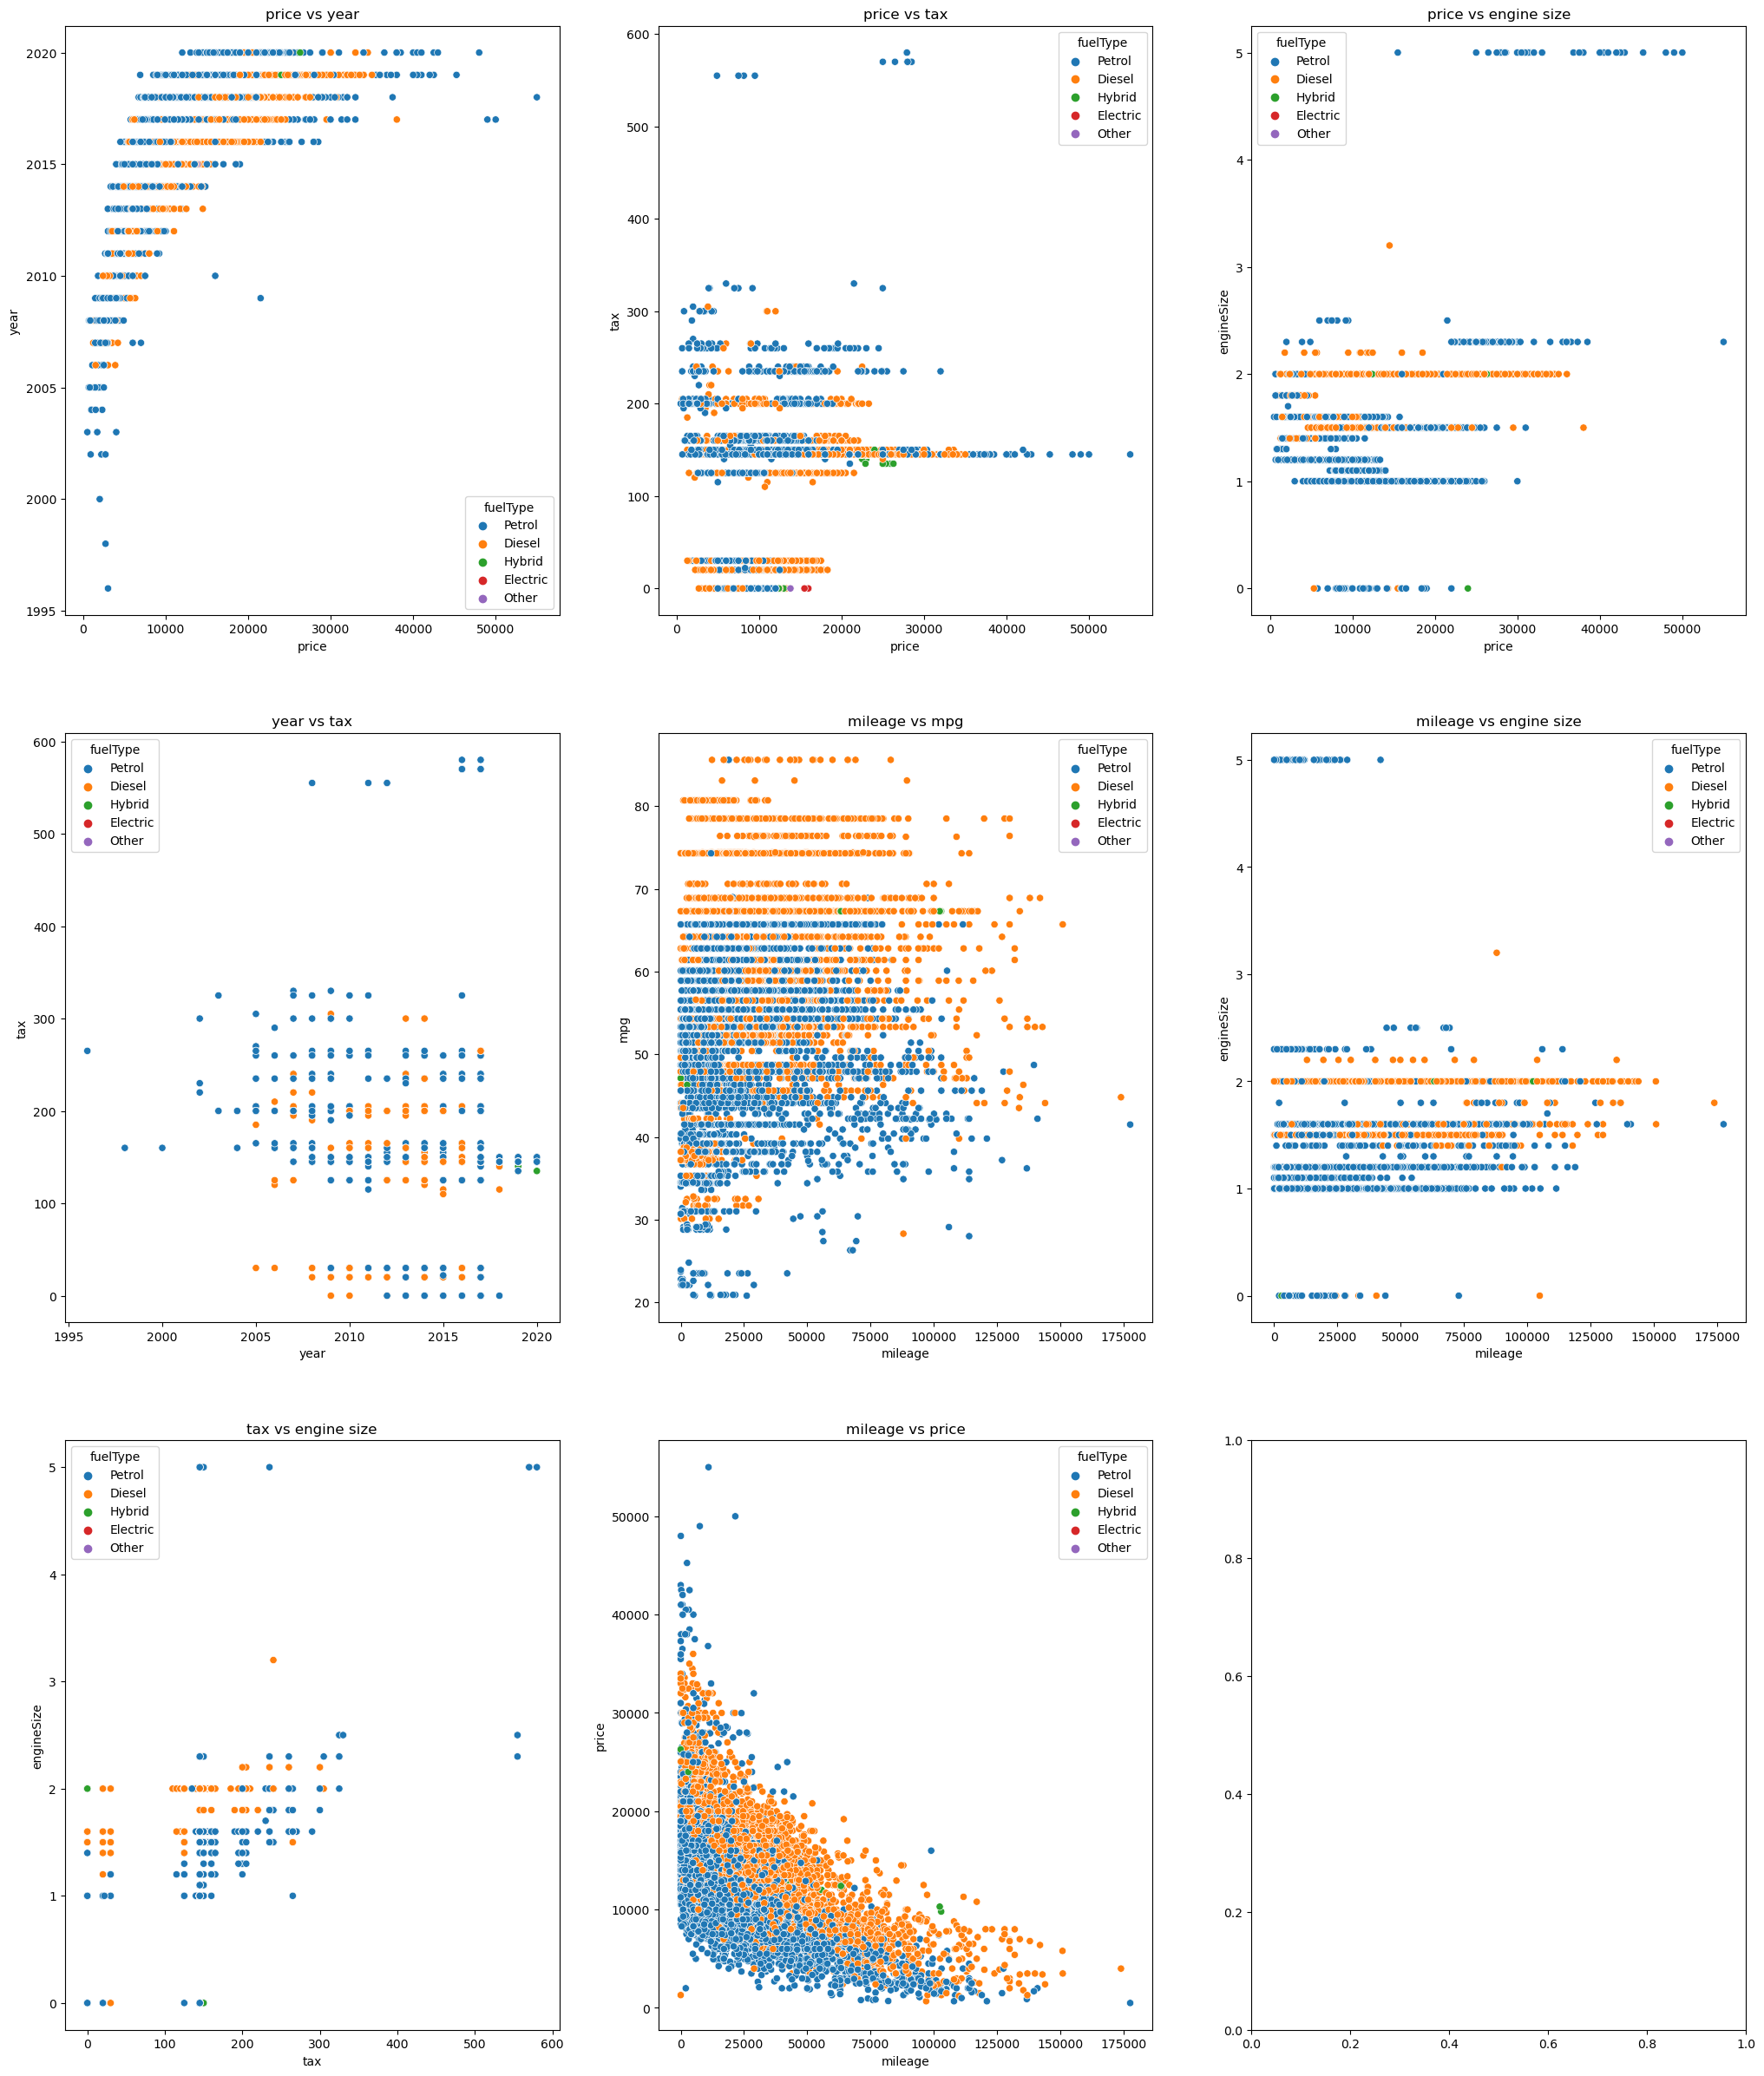

In [86]:
fig, ax = plt.subplots(3, 3, figsize = (25, 30))
for i, (x_feature, y_feature, title) in enumerate (persebaran_data):
    row = i // 3
    col = i % 3
    
    sns.scatterplot(data=df, x=x_feature, y=y_feature, hue = 'fuelType', ax=ax[row][col])
    ax[row][col].set_xlabel(x_feature)
    ax[row][col].set_ylabel(y_feature)
    ax[row][col].set_title(title, fontsize=12)

# Menampilkan plot
plt.show()

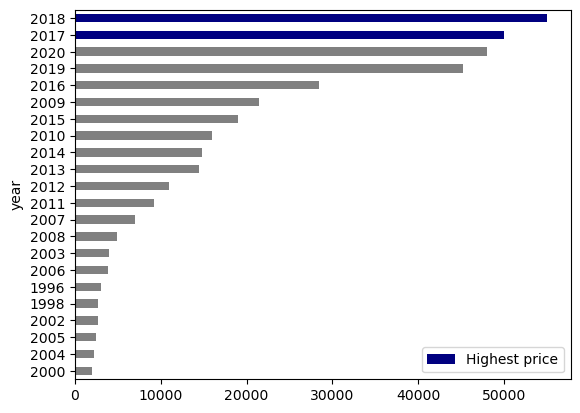

In [118]:
year_price = df.groupby('year')['price'].max().reset_index()

ax = year_price.sort_values('price', ascending = False).plot(kind ='barh', x = 'year', y= 'price', color=['navy' if i < 2 else 'grey' for i in range(len(year_price))])
ax.invert_yaxis()
plt.legend(labels = ['Highest price'])
plt.show()

Kesimpulan hasil EDA :
- Melalui scatterplot Year vs Price, bisa kita lihat bahwa mobil dengan harga tertinggi justru bukan dari tahun yang paling baru, melainkan mobil keluaran 2018 dan 2017.
- Keluaran mobil merk Ford justru paling banyak adalah bertransmission manual.
- FuelType didominasi oleh Petrol dan Diesel.
- Beberapa mobil bertipe enginesize besar juga mempengaruhi tingginya pajak pertahun.
- dari hasil scatterplot mileage vs engine size, dapat dilihat bahwa kebanyakan mobil yang memiliki mileage tinggi adalah mobil yang memiliki engine size tidak terlalu besar.
- bisa kita lihat dari scatterplot diatas bahwa, mobil yang memiliki enginesize besar memiliki fueltype = Petrol.
- mobil dengan harga tertinggi juga memiliki tipe bahan bakar 'Petrol'.
- Mobil yang memiliki miles per gallon atau mpg besar, didominasi oleh tipe bahan bakar 'Diesel'.
- Mobil yang memiliki Annual Tax tinggi didominasi oleh mobil berbahan bakar 'Petrol'.
- model mobil dengan harga tertinggi menggunakan transmission 'Manual'.
- Distribusi data pada engineSize kebanyakan didominasi dari rentang 1.0 hingga 1.5, jika diartikan dalam cc, 1000 cc hingga 1500cc
- Bisa kita lihat distribusi antara mileage dan price pada scatterplot diatas, menunjukkan bahwa, jika sebuah mobil memiliki nilai mileage tinggi, harga mobil tersebut menjadi rendah. ini dikarenakan kondisi mobil menentukan harga, semakin sering dipakai semakin turun harga mobil.

### Modelling

In [87]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [88]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.70,1.00
1,Focus,2018,14000,Manual,9083,Petrol,150,57.70,1.00
2,Focus,2017,13000,Manual,12456,Petrol,150,57.70,1.00
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.30,1.50
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.70,1.00


In [89]:
df['model'].nunique()

24

In [96]:
x = df.drop('price', axis = 1)
y = df['price'].copy()
y = pd.DataFrame(y)

In [97]:
le = LabelEncoder()
kategorikal = df.select_dtypes(include = ['object']).columns

for col in kategorikal:
    x[col] = le.fit_transform(x[col])
    print([col])
    print(le.classes_)
    print(np.sort(x[col].unique()))
    print('')

['model']
[' B-MAX' ' C-MAX' ' EcoSport' ' Edge' ' Escort' ' Fiesta' ' Focus'
 ' Fusion' ' Galaxy' ' Grand C-MAX' ' Grand Tourneo Connect' ' KA' ' Ka+'
 ' Kuga' ' Mondeo' ' Mustang' ' Puma' ' Ranger' ' S-MAX' ' Streetka'
 ' Tourneo Connect' ' Tourneo Custom' ' Transit Tourneo' 'Focus']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

['transmission']
['Automatic' 'Manual' 'Semi-Auto']
[0 1 2]

['fuelType']
['Diesel' 'Electric' 'Hybrid' 'Other' 'Petrol']
[0 1 2 3 4]



In [98]:
x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.70,1.00
1,6,2018,1,9083,4,150,57.70,1.00
2,6,2017,1,12456,4,150,57.70,1.00
3,5,2019,1,10460,4,145,40.30,1.50
4,5,2019,0,1482,4,145,48.70,1.00


In [99]:
y.head()

,price
0,12000
1,14000
2,13000
3,17500
4,16500


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [102]:
# Inisialisasi LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit model pada data pelatihan
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

 95%|█████████▌| 40/42 [11:14<00:34, 17.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 14177, number of used features: 8
[LightGBM] [Info] Start training from score 12283.759752


100%|██████████| 42/42 [11:19<00:00, 16.17s/it]


In [103]:
models.reset_index()

,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,LGBMRegressor,0.94,0.94,1156.81,1.33
1,XGBRegressor,0.94,0.94,1165.77,3.15
2,HistGradientBoostingRegressor,0.94,0.94,1171.09,3.35
3,RandomForestRegressor,0.93,0.93,1261.73,7.51
4,BaggingRegressor,0.93,0.93,1294.18,0.54
5,ExtraTreesRegressor,0.92,0.93,1310.42,3.06
6,KNeighborsRegressor,0.92,0.92,1330.31,0.24
7,GradientBoostingRegressor,0.92,0.92,1375.63,1.95
8,ExtraTreeRegressor,0.90,0.90,1519.53,0.07
9,DecisionTreeRegressor,0.90,0.90,1522.32,0.10


Menurut LazyRegressor, model terbaik untuk memprediksi harga mobil Ford dalam dataset ini menggunakan LGBMRegressor

#### LGBM Regressor

In [115]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.squeeze(y_true.values)  # Ensure y_true is a 1D array
    y_pred = np.squeeze(y_pred)  # Ensure y_pred is a 1D array
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

disini saya memutuskan untuk tidak menggunakan Hyperparamter tuning seperti GridSearchCV, dikarenakan prediksi dari LazyRegressor sudah cukup tinggi dan baik.

In [116]:
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)

y_pred = lgbm.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 14177, number of used features: 8
[LightGBM] [Info] Start training from score 12283.759752


In [117]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2 Score : ", r2)
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)
print("MAPE : ", mape)

R2 Score :  0.9407627435522109
MSE :  1356624.0831762766
MAE :  820.9430208761643
RMSE :  1164.7420672304563
MAPE :  7.064197159515381


In [122]:
features_lgbm = pd.DataFrame({'feature_name' : x_train.columns,
                             'importance_values': lgbm.feature_importances_})
features_lgbm = features_lgbm.sort_values('importance_values', ascending = False)
features_lgbm

,feature_name,importance_values
6,mpg,724
3,mileage,640
0,model,586
1,year,392
7,engineSize,354
2,transmission,129
5,tax,125
4,fuelType,50


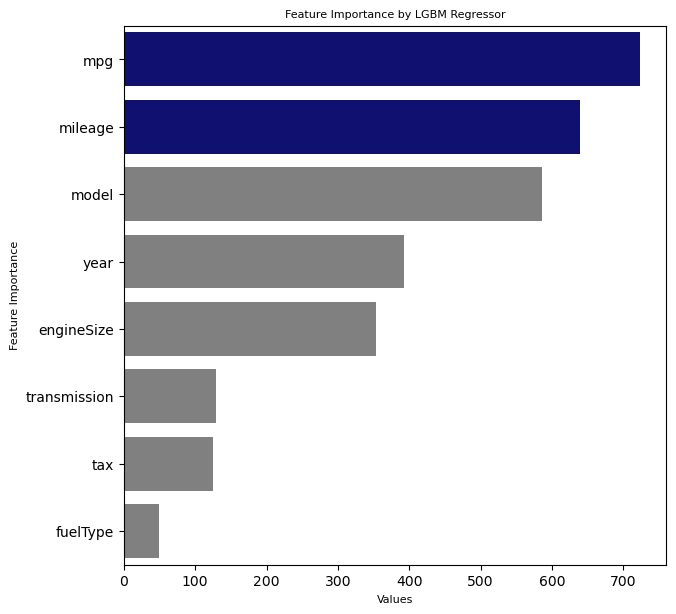

In [126]:
color=['navy' if i < 2 else 'grey' for i in range(len(features_lgbm))]

plt.figure(figsize = (7,7))
sns.barplot(data=features_lgbm, x = 'importance_values', y = 'feature_name', palette = color)
plt.title("Feature Importance by LGBM Regressor", fontsize = 8)
plt.xlabel("Values", fontsize = 8)
plt.ylabel("Feature Importance", fontsize = 8)
plt.show()

menurut feature_importances_ dari LGBMRegressor, 2 fitur paling tinggi yang berpengaruh untuk prediksi harga mobil adalah fitur 'mpg' dan 'mileage'.

     -------------------------------------- 447.3/447.3 kB 1.6 MB/s eta 0:00:00


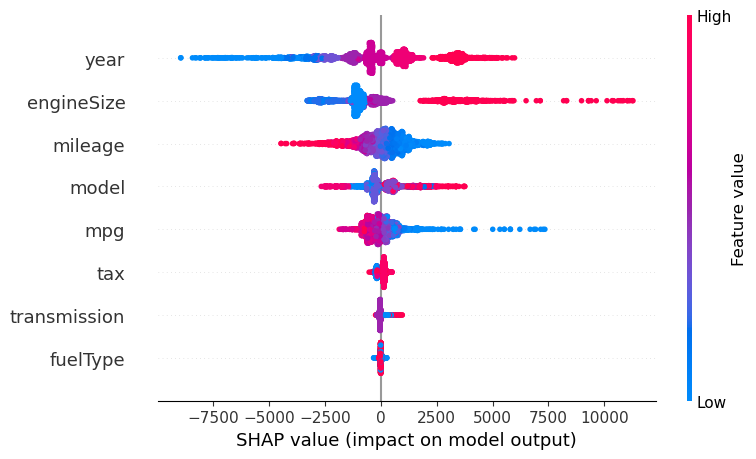

In [128]:
!pip install shap

import shap
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

Jika dilihat dari visualisasi shap summary_plot menunjukkan bahwa semakin besar ukuran mesin mobil (nilai 'enginesize' yang lebih tinggi), semakin tinggi harga mobilnya. Ini menunjukkan adanya hubungan positif antara ukuran mesin dan harga, dan semakin baru mobil (nilai 'year' yang lebih tinggi), semakin tinggi harga mobilnya. Ini menunjukkan adanya hubungan positif antara tahun pembuatan mobil dan harga. namun antara fitur enginesize dan year yang memiliki dampak besar adalah fitur enginesize

 95%|=================== | 3372/3545 [00:14<00:00]       

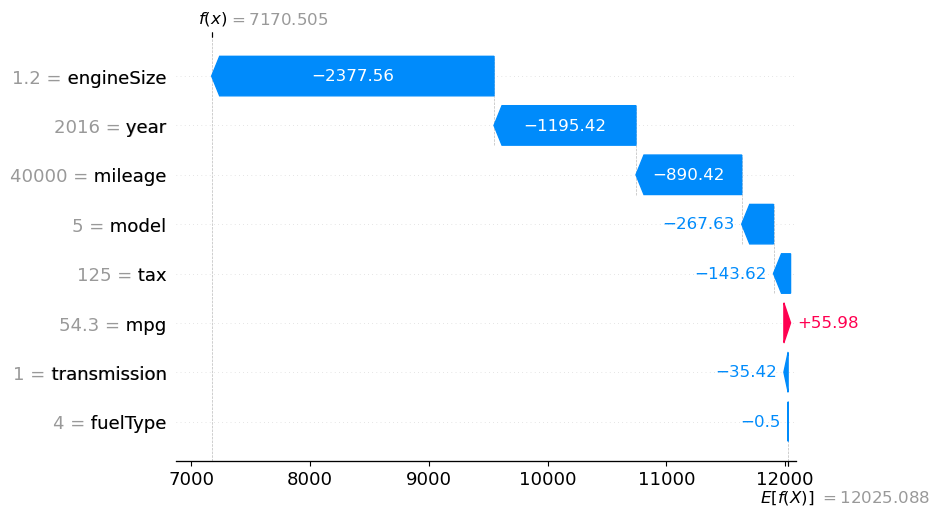

In [130]:
explainer = shap.Explainer(lgbm, x_test)
shap_values = explainer(x_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

fitur 'enginesize' dan 'year' memiliki kontribusi negatif. Misalnya, jika suatu mobil memiliki ukuran mesin ('enginesize') yang lebih besar atau tahun pembuatan ('year') yang lebih baru, model Anda cenderung memprediksi harga mobil yang lebih rendah. Dengan kata lain, mobil-mobil dengan fitur-fitur ini dapat dianggap memiliki nilai lebih rendah dalam hal prediksi harga yang diberikan oleh model.

#### XGB Regressor

In [131]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

In [132]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [133]:
y_pred = xgb.predict(x_test)

In [134]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2 Score : ", r2)
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)
print("MAPE : ", mape)

R2 Score :  0.9406495139058317
MSE :  1359217.2158501847
MAE :  816.5789818337337
RMSE :  1165.8547147265754
MAPE :  7.038632360773228


In [135]:
features_xgb = pd.DataFrame({'feature_name' : x_train.columns,
                             'importance_values': xgb.feature_importances_})
features_xgb = features_xgb.sort_values('importance_values', ascending = False)
features_xgb

,feature_name,importance_values
7,engineSize,0.48
1,year,0.37
0,model,0.06
6,mpg,0.04
3,mileage,0.02
5,tax,0.01
4,fuelType,0.01
2,transmission,0.01


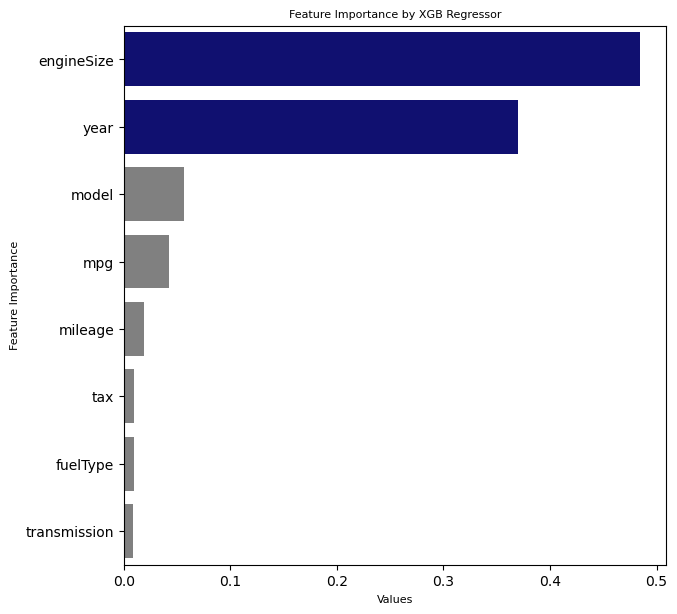

In [136]:
color=['navy' if i < 2 else 'grey' for i in range(len(features_lgbm))]

plt.figure(figsize = (7,7))
sns.barplot(data=features_xgb, x = 'importance_values', y = 'feature_name', palette = color)
plt.title("Feature Importance by XGB Regressor", fontsize = 8)
plt.xlabel("Values", fontsize = 8)
plt.ylabel("Feature Importance", fontsize = 8)
plt.show()

Dua fitur paling berpengaruh terhadap prediksi harga mobil menurut XGBRegressor adalah engineSize dan year.

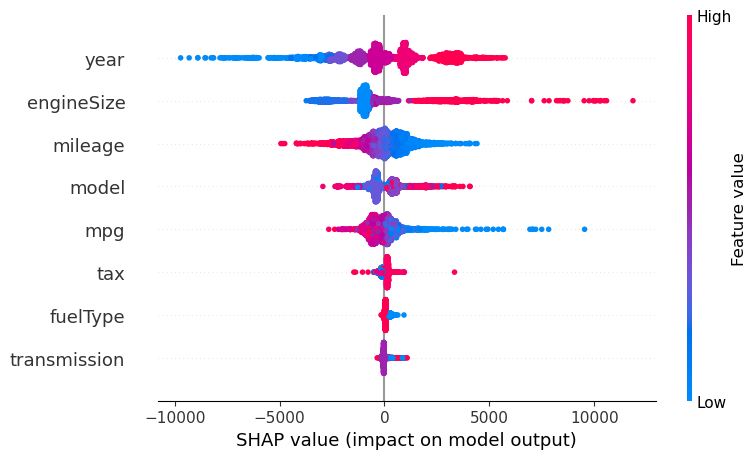

In [137]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

Ada 3 fitur yang menjadi pengaruh untuk mobil memiliki prediksi harga menjadi tinggi, yaitu fitur year, enginesize, dan model. namun bar tertinggi dimiliki oleh fitur enginesize, yang artinya fitur enginesize memiliki dampak besar terhadap prediksi harga mobil menjadi tinggi.

 94%|=================== | 3339/3545 [00:12<00:00]       

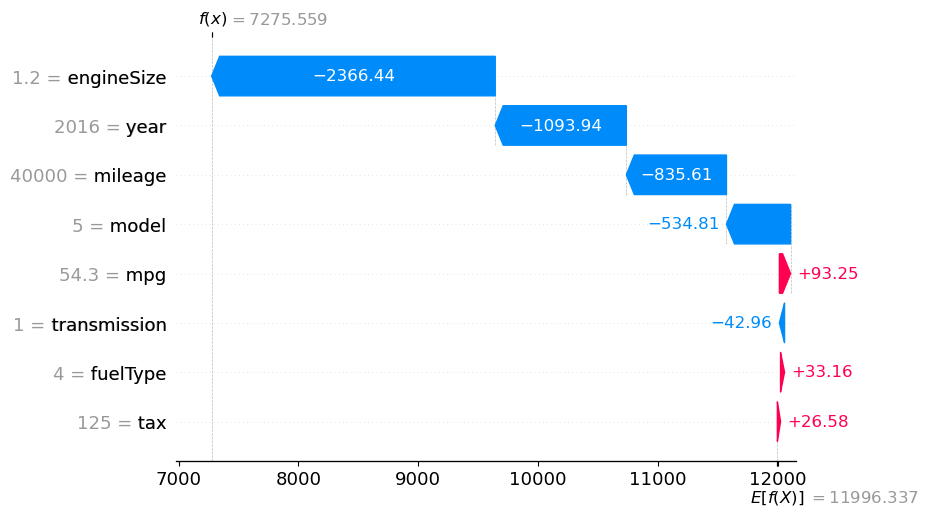

In [138]:
explainer = shap.Explainer(xgb, x_test)
shap_values = explainer(x_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

fitur 'enginesize' dan 'year' memiliki kontribusi negatif. Misalnya, jika suatu mobil memiliki ukuran mesin ('enginesize') yang lebih besar atau tahun pembuatan ('year') yang lebih baru, model Anda cenderung memprediksi harga mobil yang lebih rendah. Dengan kata lain, mobil-mobil dengan fitur-fitur ini dapat dianggap memiliki nilai lebih rendah dalam hal prediksi harga yang diberikan oleh model.

### Next steps & Rekomendasi

Karena nilai evaluasi dari masing-masing model memiliki nilai yang cukup sama, saya memutuskan memilih model dari feature_importances_ dan hasil visualisasi summary_plot. Keputusan saya jatuh kepada model XGBRegressor, dikarenakan hasil feature_importances_ dan summary_plot relatif menunjukkan nilai yang sama. berbanding terbalik jika kita lihat hasil dari LGBMRegressor.